Keypoints AKAZE : 705
Keypoints ORB : 500
Keypoints KAZE : 1169
Keypoints SIFT : 1636
[[   4.9316835  325.24033  ]
 [   6.051937   330.13733  ]
 [  19.189144   257.41727  ]
 ...
 [1237.3353      34.143818 ]
 [1237.5837     360.78778  ]
 [1237.8723     175.9634   ]]


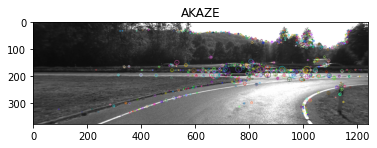

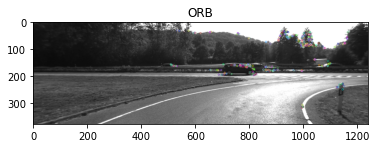

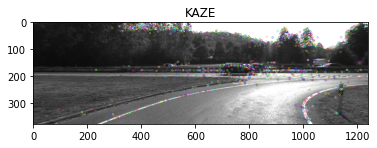

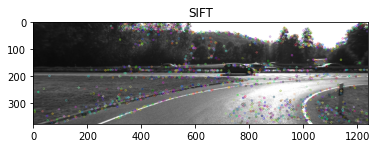

(<matplotlib.image.AxesImage at 0x1da234d81c8>, None)

In [102]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('000000.png', cv.IMREAD_GRAYSCALE)
#mg= cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# keypoint detection and feature description
#1. AKAZE
akaze = cv.AKAZE_create()
kp_akaze = akaze.detect(img, None) # find keypoints
kp_akaze, des_akaze = akaze.compute(img, kp_akaze) # compute descriptors with AKAZE
# kp_akaze, des_akaze =akaze.detectAndCompute(img, None)
print("Keypoints AKAZE : {}".format(len(kp_akaze)))

#2, ORB
orb = cv.ORB_create()
kp_orb = orb.detect(img, None) # find keypoints
kp_orb, des_orb = orb.compute(img, kp_orb) # compute descriptors with ORB
# kp_orb, des_orb =orb.detectAndCompute(img, None)
print("Keypoints ORB : {}".format(len(kp_orb)))

#3. KAZE
kaze = cv.KAZE_create()
kp_kaze = kaze.detect(img, None)
kp_kaze, des_kaze = kaze.compute(img, kp_kaze)
# kp_kaze, des_kaze =kaze.detectAndCompute(img, None)
print("Keypoints KAZE : {}".format(len(kp_kaze)))

#4. SIFT
sift = cv.SIFT_create()
kp_sift = sift.detect(img, None)
kp_sift, des_sift = sift.compute(img, kp_sift)
print("Keypoints SIFT : {}".format(len(kp_sift)))
# kp_sift, des_sift =sift.detectAndCompute(img, None)

a = np.array(list(map(lambda x : [x.pt], kp_sift)), dtype = np.float32).squeeze()
print(a)
# draw keypoints 
img_akaze =cv.drawKeypoints(img, kp_akaze, img ,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img_orb =cv.drawKeypoints(img, kp_orb, None)
img_kaze = cv.drawKeypoints(img, kp_kaze, None)
img_sift = cv.drawKeypoints(img, kp_sift, None)
#img2 =cv.drawKeypoints(img, kp, None)

# plot 
plt.title("AKAZE")
plt.imshow(img_akaze), plt.show()
# cv.imwrite('akaze_keypoints.png',img_akaze)
plt.title("ORB")
plt.imshow(img_orb), plt.show()
plt.title("KAZE")
plt.imshow(img_kaze), plt.show()
plt.title("SIFT")
plt.imshow(img_sift), plt.show()

[[ 2.25080380e-04 -7.06988226e-01 -5.89982512e-03]
 [ 7.06818240e-01  4.50913637e-04 -1.98525177e-02]
 [ 3.69720235e-03 -1.15208331e-02 -1.99902029e-04]]


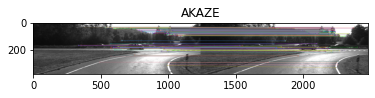

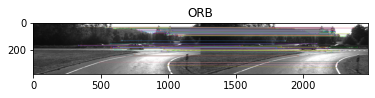

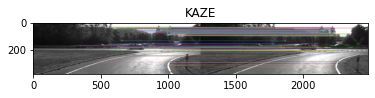

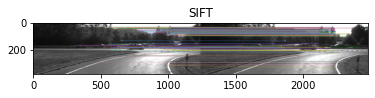

(<matplotlib.image.AxesImage at 0x1da21957e48>, None)

In [115]:
# feature matching

img1 = cv.imread('000000.png', cv.IMREAD_GRAYSCALE)  # referenceImage
img2 = cv.imread('000001.png', cv.IMREAD_GRAYSCALE)  # sensedImage
# Find the keypoints and descriptors with AKAZE
kp1_akaze, des1_akaze = akaze.detectAndCompute(img1, None)
kp2_akaze, des2_akaze = akaze.detectAndCompute(img2, None)

# Find the keypoints and descriptors with ORB
kp1_orb, des1_orb = orb.detectAndCompute(img1, None)
kp2_orb, des2_orb = orb.detectAndCompute(img2, None)

# Find the keypoints and descriptors with KAZE
kp1_kaze, des1_kaze = kaze.detectAndCompute(img1, None)
kp2_kaze, des2_kaze = kaze.detectAndCompute(img2, None)

# Find the keypoints and descriptors with SIFT
kp1_sift, des1_sift = sift.detectAndCompute(img1, None)
kp2_sift, des2_sift = sift.detectAndCompute(img2, None)


# BFMatcher with default params
# brute-force matcher
# 사이즈가 커지면 속도 저하
bf = cv.BFMatcher()
matches_akaze = bf.knnMatch(des1_akaze, des2_akaze, k=2)
matches_orb = bf.knnMatch(des1_orb, des2_orb, k=2)
#matches_kaze = bf.knnMatch(des1_kaze, des2_kaze, k=2)
# matches_sift = bf.knnMatch(des1_sift, des2_sift, k=2)

# flann
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(check = 50)
flann = cv.FlannBasedMatcher(index_params, search_params)
# matches_akaze = flann.knnMatch(des1_akaze, des2_akaze, k=2)  # FAST 기반 descriptor는 사용 불가
# matches_orb = flann.knnMatch(des1_orb, des2_orb, k=2)
matches_kaze = flann.knnMatch(des1_kaze, des2_kaze, k=2)
matches_sift = flann.knnMatch(des1_sift, des2_sift, k=2)

# Apply ratio test
good_matches_akaze = []
good_matches_orb = []
good_matches_kaze = []
good_matches_sift = []

pt1 = []
pt2 = []

for m,n in matches_akaze:
    if m.distance < 0.75*n.distance:
        good_matches_akaze.append([m])
        pt1.append(kp1_akaze[m.queryIdx].pt)
        pt2.append(kp2_akaze[m.trainIdx].pt)
for m,n in matches_orb:
    if m.distance < 0.75*n.distance:
        good_matches_orb.append([m])
for m,n in matches_kaze:
    if m.distance < 0.75*n.distance:
        good_matches_kaze.append([m])
for m,n in matches_sift:
    if m.distance < 0.75*n.distance:
        good_matches_sift.append([m])
        
        
#######################################        
pt1 = np.float32(pt1)
pt2 = np.float32(pt2)

E, mask = cv.findEssentialMat(pt1, pt2, camera_matrix, cv.RANSAC, 0.999, 1.0, None)
print(E)
################################################  


# Draw matches
img_akaze = cv.drawMatchesKnn(img1,kp1_akaze,img2,kp2_akaze,good_matches_akaze,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
img_orb = cv.drawMatchesKnn(img1,kp1_orb,img2,kp2_orb,good_matches_orb,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
img_kaze = cv.drawMatchesKnn(img1,kp1_kaze,img2,kp2_kaze,good_matches_kaze,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
img_sift = cv.drawMatchesKnn(img1,kp1_sift,img2,kp2_sift,good_matches_sift,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
#cv.imwrite('matches.jpg', img3)

# plot 
plt.title("AKAZE")
plt.imshow(img_akaze), plt.show()
plt.title("ORB")
plt.imshow(img_akaze), plt.show()
plt.title("KAZE")
plt.imshow(img_akaze), plt.show()
plt.title("SIFT")
plt.imshow(img_akaze), plt.show()



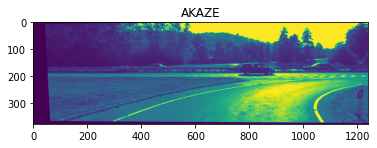

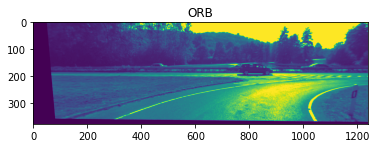

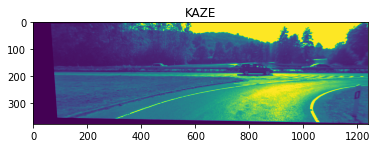

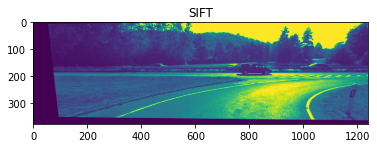

(<matplotlib.image.AxesImage at 0x1da0b481588>, None)

In [46]:
# Image Warping

# calculate Homography matrix => 8 parameters and represent 3x3 matrix

# select good matched keypoints
ref_matched_kpts_akaze = np.float32([kp1_akaze[m[0].queryIdx].pt for m in good_matches_akaze])
sensed_matched_kpts_akaze = np.float32([kp2_akaze[m[0].trainIdx].pt for m in good_matches_akaze])

ref_matched_kpts_orb = np.float32([kp1_orb[m[0].queryIdx].pt for m in good_matches_orb])
sensed_matched_kpts_orb = np.float32([kp2_orb[m[0].trainIdx].pt for m in good_matches_orb])

ref_matched_kpts_kaze = np.float32([kp1_kaze[m[0].queryIdx].pt for m in good_matches_kaze])
sensed_matched_kpts_kaze = np.float32([kp2_kaze[m[0].trainIdx].pt for m in good_matches_kaze])

ref_matched_kpts_sift = np.float32([kp1_sift[m[0].queryIdx].pt for m in good_matches_sift])
sensed_matched_kpts_sift = np.float32([kp2_sift[m[0].trainIdx].pt for m in good_matches_sift])

# Compute homography (+ RANSAC)
H_akaze, status_akaze = cv.findHomography(sensed_matched_kpts_akaze, ref_matched_kpts_akaze, cv.RANSAC,5.0)
H_orb, status_orb = cv.findHomography(sensed_matched_kpts_orb, ref_matched_kpts_orb, cv.RANSAC,5.0)
H_kaze, status_kaze = cv.findHomography(sensed_matched_kpts_kaze, ref_matched_kpts_kaze, cv.RANSAC,5.0)
H_sift, status_sift = cv.findHomography(sensed_matched_kpts_sift, ref_matched_kpts_sift, cv.RANSAC,5.0)

# Warp image
warped_image_akaze = cv.warpPerspective(img2, H_akaze, (img2.shape[1], img2.shape[0]))
warped_image_orb = cv.warpPerspective(img2, H_orb, (img2.shape[1], img2.shape[0]))
warped_image_kaze = cv.warpPerspective(img2, H_kaze, (img2.shape[1], img2.shape[0]))
warped_image_sift = cv.warpPerspective(img2, H_sift, (img2.shape[1], img2.shape[0]))

plt.title("AKAZE")
plt.imshow(warped_image_orb), plt.show()
plt.title("ORB")
plt.imshow(warped_image_akaze), plt.show()
plt.title("KAZE")
plt.imshow(warped_image_kaze), plt.show()
plt.title("SIFT")
plt.imshow(warped_image_sift), plt.show()

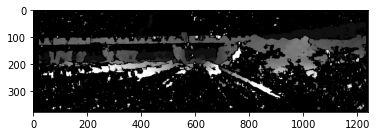

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


376


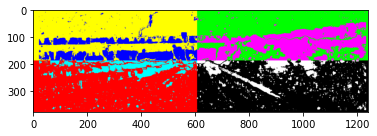

In [49]:
# 스테레오 카메라 Disparity map 

imgL = cv.imread("./image_0/001100.png",0)
imgR = cv.imread("./image_1/001100.png",0)

stereo = cv.StereoBM_create(numDisparities=16, blockSize=15)
disparity = stereo.compute(imgL, imgR) # Disparity boundary is (-16 ~ 496)
plt.imshow(disparity,'gray')
plt.show()

print(len(disparity))
# Z (depth 구하기) = B(baseline : 두 카메라 사이 거리) * f (focal length) / disparity 
# KITTI calib 폴더에 Projection Matrix 가 제공 
# P0 : grayscale left => P0[0,0] : Fx / P0[0,2] : Cx / P0[1,1] : Fy / P0[1,2] : Cy
# P1 : grayscale right
# p2,3 : color (left , right)
# P0: 7.188560000000e+02 0.000000000000e+00 6.071928000000e+02 0.000000000000e+00 0.000000000000e+00 7.188560000000e+02 1.852157000000e+02 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 1.000000000000e+00 0.000000000000e+00
# P1: 7.188560000000e+02 0.000000000000e+00 6.071928000000e+02 -3.861448000000e+02 0.000000000000e+00 7.188560000000e+02 1.852157000000e+02 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 1.000000000000e+00 0.000000000000e+00
# Tr: 4.276802385584e-04 -9.999672484946e-01 -8.084491683471e-03 -1.198459927713e-02 -7.210626507497e-03 8.081198471645e-03 -9.999413164504e-01 -5.403984729748e-02 9.999738645903e-01 4.859485810390e-04 -7.206933692422e-03 -2.921968648686e-01

f_l = 7.188560000000e+02
f_r = 7.188560000000e+02
c_x_l = 6.071928000000e+02
c_y_l = 1.852157000000e+02
c_x_r = 6.071928000000e+02
c_y_r = 1.852157000000e+02
baseline = -3.861448000000e+02
camera_matrix = np.array([[718.8560, 0.0, 607.1928],
                          [0.0, 718.8560, 185.2157],
                          [0.0, 0.0, 1.0]])

# Z = np.divide((baseline * f_l), disparity)
# plt.imshow(Z,'gray')
# print(Z)
# print(len(Z))


Q = np.float32([[1, 0, 0, -c_x_l],
               [0, 1, 0, -c_y_l],
               [0, 0, 0, f_l],
               [0, 0, -1/baseline, 0]])

depth_pt = cv.reprojectImageTo3D(disparity, Q)
plt.imshow(depth_pt)
plt.show()

In [46]:
img_file_L = os.path.join('./image_0/', '{:06d}.png').format(2)
name_L = './image_0/' + img_file_L
img_L = cv.imread(name_L,0)

img_file_R = os.path.join('./image_1/', '{:06d}.png').format(2)
name_R = './image_1/'+img_file_R
img_R = cv.imread(name_R,0)


stereo = cv.StereoBM_create(numDisparities=16, blockSize=15)
disparity = stereo.compute(img_L, img_R)  # Disparity boundary is (-16 ~ 496)
disparity_Norm = np.divide(disparity, 16.0)  # # Disparity boundary is (-1 ~ 496/16)


In [ ]:
# decompose Essenstial Matrix 
R1, R2, T = cv.decomposeEssentialMat(E)

check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1

KeyboardInterrupt: 

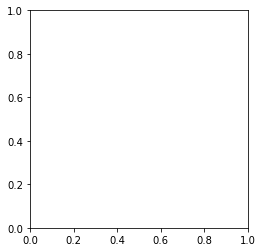

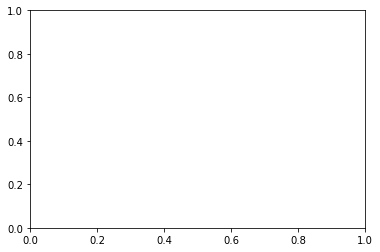

In [142]:
import os
import glob
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

##################plot graph#######################
position_figure = plt.figure()
position_axes = position_figure.add_subplot(1, 1, 1)
error_figure = plt.figure()
rotation_error_axes = error_figure.add_subplot(1, 1, 1)
rotation_error_list = []
frame_index_list = []

position_axes.set_aspect('equal', adjustable='box')
####################################################

prev_img = None

current_pos_akaze = np.zeros((3, 1))
current_rot_akaze = np.eye(3)
# current_pos_orb = np.zeros((3, 1))
# current_rot_orb = np.eye(3)
# current_pos_kaze = np.zeros((3, 1))
# current_rot_kaze = np.eye(3)
# current_pos_sift = np.zeros((3, 1))
# current_rot_sift = np.eye(3)

camera_matrix = np.array([[718.8560, 0.0, 607.1928],
                          [0.0, 718.8560, 185.2157],
                          [0.0, 0.0, 1.0]])

output = len(glob.glob('./image_0/*.png')) #사진 개수 

for index in range(output): 
    img_file = os.path.join('./image_0/','{:06d}.png').format(index)
    img = cv.imread('./image_0/{}'.format(img_file))
    #print("check: {} , img : {} ".format(index, img))
    # cvtColor는 안함  이미 변환되어 있으니까
    print("check1")
    # keypoint detection and feature description
    #1. AKAZE
    akaze = cv.AKAZE_create()
    kp_akaze = akaze.detect(img, None) # find keypoints
    kp_akaze, des_akaze = akaze.compute(img, kp_akaze) # compute descriptors with AKAZE
    # kp_akaze, des_akaze =akaze.detectAndCompute(img, None)
    #print("Keypoints AKAZE : {}".format(len(kp_akaze)))
    print("check2")
#     #2, ORB
#     orb = cv.ORB_create()
#     kp_orb = orb.detect(img, None) # find keypoints
#     kp_orb, des_orb = orb.compute(img, kp_orb) # compute descriptors with ORB
#     # kp_orb, des_orb =orb.detectAndCompute(img, None)
#     #print("Keypoints ORB : {}".format(len(kp_orb)))

#     #3. KAZE
#     kaze = cv.KAZE_create()
#     kp_kaze = kaze.detect(img, None)
#     kp_kaze, des_kaze = kaze.compute(img, kp_kaze)
#     # kp_kaze, des_kaze =kaze.detectAndCompute(img, None)
#     #print("Keypoints KAZE : {}".format(len(kp_kaze)))

#     #4. SIFT
#     sift = cv.SIFT_create()
#     kp_sift = sift.detect(img, None)
#     kp_sift, des_sift = sift.compute(img, kp_sift)
#     #print("Keypoints SIFT : {}".format(len(kp_sift)))
#     # kp_sift, des_sift =sift.detectAndCompute(img, None)
    
    if prev_img is None:
        prev_img = img
        prev_keypoint_akaze = kp_akaze
#         prev_keypoint_orb = kp_orb
#         prev_keypoint_kaze = kp_kaze
#         prev_keypoint_sift = kp_sift
        #
        prev_des_akaze = des_akaze
#         prev_des_orb = des_orb
#         prev_des_kaze = des_kaze
#         prev_des_sift = des_sift
        continue
        
    points_akaze = np.array(list(map(lambda x : [x.pt], prev_keypoint_akaze)), dtype = np.float32).squeeze() 
#     points_orb = np.array(list(map(lambda x : [x.pt], prev_keypoint_orb)), dtype = np.float32).squeeze() 
#     points_kaze = np.array(list(map(lambda x : [x.pt], prev_keypoint_kaze)), dtype = np.float32).squeeze() 
#     points_sift = np.array(list(map(lambda x : [x.pt], prev_keypoint_sift)), dtype = np.float32).squeeze() 
    print("check3")
    # BFMatcher with default params
    # brute-force matcher
    # 사이즈가 커지면 속도 저하
    bf = cv.BFMatcher()
    matches_akaze = bf.knnMatch(prev_des_akaze, des_akaze, k=2)
#     matches_orb = bf.knnMatch(prev_des_orb, des_orb, k=2)
#     matches_kaze = bf.knnMatch(prev_des_kaze, des_kaze, k=2)
#     matches_sift = bf.knnMatch(prev_des_sift, des_sift, k=2)

    pt1_akaze, pt2_akaze = [],[]
#     pt1_orb, pt2_orb = [],[]
#     pt1_kaze, pt2_kaze = [],[]
#     pt1_sift, pt2_sift = [],[]
    print("check4")
    for m,n in matches_akaze:
        if m.distance < 0.75*n.distance:
            good_matches_akaze.append([m])
            pt1_akaze.append(prev_keypoint_akaze[m.queryIdx].pt)
            pt2_akaze.append(kp_akaze[m.trainIdx].pt)
#     for m,n in matches_orb:
#         if m.distance < 0.75*n.distance:
#             good_matches_orb.append([m])
#             pt1_orb.append(prev_keypoint_orb[m.queryIdx].pt)
#             pt2_orb.append(kp_orb[m.trainIdx].pt)
#     for m,n in matches_kaze:
#         if m.distance < 0.75*n.distance:
#             good_matches_kaze.append([m])
#             pt1_kaze.append(prev_keypoint_kaze[m.queryIdx].pt)
#             pt2_kaze.append(kp_kaze[m.trainIdx].pt)
#     for m,n in matches_sift:
#         if m.distance < 0.75*n.distance:
#             good_matches_sift.append([m])
#             pt1_sift.append(prev_keypoint_sift[m.queryIdx].pt)
#             pt2_sift.append(kp_sift[m.trainIdx].pt)

    print("check5")
    #
    pt1_akaze, pt2_akaze = np.float32(pt1_akaze), np.float32(pt2_akaze)
#     pt1_orb, pt2_orb = np.float32(pt1_orb), np.float32(pt2_orb)
#     pt1_kaze, pt2_kaze = np.float32(pt1_kaze), np.float32(pt2_kaze)
#     pt1_sift, pt2_sift = np.float32(pt1_sift), np.float32(pt2_sift)
    # Essenstial Matrix
    E_akaze, mask_akaze = cv.findEssentialMat(pt1_akaze, pt2_akaze, camera_matrix, cv.RANSAC, 0.999, 1.0, None)
#     E_orb, mask_orb = cv.findEssentialMat(pt1_orb, pt2_orb, camera_matrix, cv.RANSAC, 0.999, 1.0, None)
#     E_kaze, mask_kaze = cv.findEssentialMat(pt1_kaze, pt2_kaze, camera_matrix, cv.RANSAC, 0.999, 1.0, None)
#     E_sift, mask_sift = cv.findEssentialMat(pt1_sift, pt2_sift, camera_matrix, cv.RANSAC, 0.999, 1.0, None)

#    E, mask = cv.findEssentialMat(matches_akaze, points_akaze, camera_matrix, cv.RANSAC, 0.999, 1.0, None)
    print("check6")
    pt1_akaze, R_akaze, t_akaze, mask_akaze = cv.recoverPose(E_akaze, pt2_akaze, pt1_akaze, camera_matrix)
#     pt1_orb, R_orb, t_orb, mask_orb = cv.recoverPose(E_orb, pt2_akaze, pt1_orb, camera_matrix)
#     pt1_kaze, R_kaze, t_kaze, mask_kaze = cv.recoverPose(E_kaze, pt2_kaze, pt1_kaze, camera_matrix)
#     pt1_sift, R_sift, t_sift, mask_sift = cv.recoverPose(E_sift, pt2_sift, pt1_sift, camera_matrix)

    scale = 1.0
    
    # 우선 ground truth가 없다면 scale 계산은 하지 않고 
    current_pos_akaze += current_rot_akaze.dot(t_akaze) * scale
    current_rot_akaze = R_akaze.dot(current_rot_akaze)
    print("check7")
#     current_pos_orb += current_rot_orb.dot(t_orb) * scale
#     current_rot_orb = R_orb.dot(current_rot_orb)
    
#     current_pos_kaze += current_rot_kaze.dot(t_kaze) * scale
#     current_rot_kaze = R_kaze.dot(current_rot_kaze)
    
#     current_pos_sift += current_rot_sift.dot(t_sift) * scale
#     current_rot_sift = R_sift.dot(current_rot_sift)
    
    # 
    position_axes.scatter(current_pos_akaze[0][0], current_pos_akaze[2][0])
#     position_axes.scatter(current_pos_orb[0][0], current_pos_orb[2][0])
#     position_axes.scatter(current_pos_kaze[0][0], current_pos_kaze[2][0])
#     position_axes.scatter(current_pos_sift[0][0], current_pos_sift[2][0])
    plt.pause(.01)
    print("check8")
    plot_img = cv.drawKeypoints(img, kp_akaze, None)
    
    plt.imshow('feature', plot_img)
    
    
    prev_img = img
    prev_keypoint_akaze = kp_akaze
    prev_keypoint_orb = kp_orb
    prev_keypoint_kaze = kp_kaze
    prev_keypoint_sift = kp_sift
    
    prev_des_akaze = des_akaze
    prev_des_orb = des_orb
    prev_des_kaze = des_kaze
    prev_des_sift = des_sift
    
    

checheck
check3
check4
check5
check6
check7


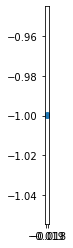

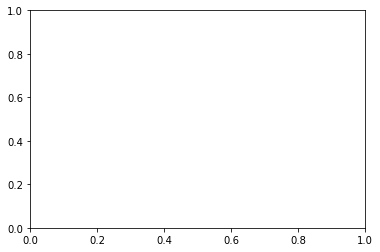

check8
check3
check4
check5
check6
check7
check8
check3
check4
check5
check6
check7
check8
check3
check4
check5
check6
check7
check8
check3
check4
check5
check6
check7
check8
check3
check4
check5
check6
check7
check8
check3
check4
check5
check6
check7
check8
check3
check4
check5
check6
check7
check8
check3
check4
check5
check6
check7
check8
check3
check4
check5
check6
check7
check8
check3
check4
check5
check6
check7
check8
check3
check4
check5
check6
check7
check8
check3
check4
check5
check6
check7
check8
check3
check4
check5
check6
check7
check8
check3
check4
check5
check6
check7
check8
check3
check4
check5
check6
check7
check8
check3
check4
check5
check6
check7
check8
check3
check4
check5
check6
check7
check8
check3
check4
check5
check6
check7
check8
check3
check4
check5
check6
check7
check8
check3
check4
check5
check6
check7
check8
check3
check4
check5
check6
check7
check8
check3
check4
check5
check6
check7
check8
check3
check4
check5
check6
check7
check8
check3
check4
check5
check6

KeyboardInterrupt: 

In [147]:
import os
import glob
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

##################plot graph#######################
position_figure = plt.figure()
position_axes = position_figure.add_subplot(1, 1, 1)
error_figure = plt.figure()
rotation_error_axes = error_figure.add_subplot(1, 1, 1)
rotation_error_list = []
frame_index_list = []

position_axes.set_aspect('equal', adjustable='box')
####################################################

prev_img = None

current_pos_akaze = np.zeros((3, 1))
current_rot_akaze = np.eye(3)
# current_pos_orb = np.zeros((3, 1))
# current_rot_orb = np.eye(3)
# current_pos_kaze = np.zeros((3, 1))
# current_rot_kaze = np.eye(3)
# current_pos_sift = np.zeros((3, 1))
# current_rot_sift = np.eye(3)

camera_matrix = np.array([[718.8560, 0.0, 607.1928],
                          [0.0, 718.8560, 185.2157],
                          [0.0, 0.0, 1.0]])

output = len(glob.glob('./image_0/*.png')) #사진 개수 

for index in range(output): 
    img_file = os.path.join('./image_0/','{:06d}.png').format(index)
    img = cv.imread('./image_0/{}'.format(img_file))


    #1. AKAZE
    akaze = cv.AKAZE_create()
    kp_akaze = akaze.detect(img, None) # find keypoints
    kp_akaze, des_akaze = akaze.compute(img, kp_akaze) # compute descriptors with AKAZE

    
    if prev_img is None:
        prev_img = img
        prev_keypoint_akaze = kp_akaze
        prev_des_akaze = des_akaze
        continue
        
    points_akaze = np.array(list(map(lambda x : [x.pt], prev_keypoint_akaze)), dtype = np.float32).squeeze() 

    # BFMatcher with default params
    # brute-force matcher
    # 사이즈가 커지면 속도 저하
    bf = cv.BFMatcher()
    matches_akaze = bf.knnMatch(prev_des_akaze, des_akaze, k=2)


    pt1_akaze, pt2_akaze = [],[]


    for m,n in matches_akaze:
        if m.distance < 0.75*n.distance:
            good_matches_akaze.append([m])
            pt1_akaze.append(prev_keypoint_akaze[m.queryIdx].pt)
            pt2_akaze.append(kp_akaze[m.trainIdx].pt)



    #
    pt1_akaze, pt2_akaze = np.float32(pt1_akaze), np.float32(pt2_akaze)

    # Essenstial Matrix
    E_akaze, mask_akaze = cv.findEssentialMat(pt1_akaze, pt2_akaze, camera_matrix, cv.RANSAC, 0.999, 1.0, None)

    pt1_akaze, R_akaze, t_akaze, mask_akaze = cv.recoverPose(E_akaze, pt2_akaze, pt1_akaze, camera_matrix)

    scale = 1.0
    
    # 우선 ground truth가 없다면 scale 계산은 하지 않고 
    current_pos_akaze += current_rot_akaze.dot(t_akaze) * scale
    current_rot_akaze = R_akaze.dot(current_rot_akaze)

 
    # 
    position_axes.scatter(current_pos_akaze[0][0], current_pos_akaze[2][0])

    plt.pause(.01)
    
    plot_img = cv.drawKeypoints(img, kp_akaze, None)
    
    cv.imshow('feature', plot_img)
    cv.waitKey(1)
    
    
    prev_img = img
    prev_keypoint_akaze = kp_akaze
    prev_des_akaze = des_akaze


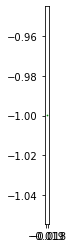

KeyboardInterrupt: 

In [9]:
import os
import glob
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

##################plot graph#######################
position_figure = plt.figure()
position_axes = position_figure.add_subplot(1, 1, 1)
# error_figure = plt.figure()
# rotation_error_axes = error_figure.add_subplot(1, 1, 1)
# rotation_error_list = []
# frame_index_list = []

position_axes.set_aspect('equal', adjustable='box')
####################################################

###############ground truth###################################
gt_file = glob.glob('./poses/01.txt')

ground_truth = []
with open(*gt_file) as f:
    gt_lines = f.readlines()

    for gt_line in gt_lines:
        pose = np.array(gt_line.split()).reshape((3,4)).astype(np.float32)
        ground_truth.append(pose)

#######################################################################

prev_img = None

current_pos_akaze = np.zeros((3, 1))
current_rot_akaze = np.eye(3)
# current_pos_orb = np.zeros((3, 1))
# current_rot_orb = np.eye(3)
# current_pos_kaze = np.zeros((3, 1))
# current_rot_kaze = np.eye(3)
# current_pos_sift = np.zeros((3, 1))
# current_rot_sift = np.eye(3)

camera_matrix = np.array([[718.8560, 0.0, 607.1928],
                          [0.0, 718.8560, 185.2157],
                          [0.0, 0.0, 1.0]])

output = len(glob.glob('./image_0/*.png'))  # 사진 개수

for index in range(output):
    img_file = os.path.join('./image_0/', '{:06d}.png').format(index)
    img = cv.imread('./image_0/{}'.format(img_file))
    # print("check: {} , img : {} ".format(index, img))
    # cvtColor는 안함  이미 변환되어 있으니까

    # keypoint detection and feature description
    # 1. AKAZE
    akaze = cv.AKAZE_create()
    kp_akaze = akaze.detect(img, None)  # find keypoints
    kp_akaze, des_akaze = akaze.compute(img, kp_akaze)  # compute descriptors with AKAZE
    # kp_akaze, des_akaze =akaze.detectAndCompute(img, None)
    # print("Keypoints AKAZE : {}".format(len(kp_akaze)))

    #     #2, ORB
    #     orb = cv.ORB_create()
    #     kp_orb = orb.detect(img, None) # find keypoints
    #     kp_orb, des_orb = orb.compute(img, kp_orb) # compute descriptors with ORB
    #     # kp_orb, des_orb =orb.detectAndCompute(img, None)
    #     #print("Keypoints ORB : {}".format(len(kp_orb)))

    #     #3. KAZE
    #     kaze = cv.KAZE_create()
    #     kp_kaze = kaze.detect(img, None)
    #     kp_kaze, des_kaze = kaze.compute(img, kp_kaze)
    #     # kp_kaze, des_kaze =kaze.detectAndCompute(img, None)
    #     #print("Keypoints KAZE : {}".format(len(kp_kaze)))

    #     #4. SIFT
    #     sift = cv.SIFT_create()
    #     kp_sift = sift.detect(img, None)
    #     kp_sift, des_sift = sift.compute(img, kp_sift)
    #     #print("Keypoints SIFT : {}".format(len(kp_sift)))
    #     # kp_sift, des_sift =sift.detectAndCompute(img, None)

    if prev_img is None:
        prev_img = img
        prev_keypoint_akaze = kp_akaze
        #         prev_keypoint_orb = kp_orb
        #         prev_keypoint_kaze = kp_kaze
        #         prev_keypoint_sift = kp_sift
        #
        prev_des_akaze = des_akaze
        #         prev_des_orb = des_orb
        #         prev_des_kaze = des_kaze
        #         prev_des_sift = des_sift
        continue

    points_akaze = np.array(list(map(lambda x: [x.pt], prev_keypoint_akaze)), dtype=np.float32).squeeze()
    #     points_orb = np.array(list(map(lambda x : [x.pt], prev_keypoint_orb)), dtype = np.float32).squeeze()
    #     points_kaze = np.array(list(map(lambda x : [x.pt], prev_keypoint_kaze)), dtype = np.float32).squeeze()
    #     points_sift = np.array(list(map(lambda x : [x.pt], prev_keypoint_sift)), dtype = np.float32).squeeze()

    # BFMatcher with default params
    # brute-force matcher
    # 사이즈가 커지면 속도 저하
    bf = cv.BFMatcher()
    matches_akaze = bf.knnMatch(prev_des_akaze, des_akaze, k=2)
    #     matches_orb = bf.knnMatch(prev_des_orb, des_orb, k=2)
    #     matches_kaze = bf.knnMatch(prev_des_kaze, des_kaze, k=2)
    #     matches_sift = bf.knnMatch(prev_des_sift, des_sift, k=2)

    # Apply ratio test
    good_matches_akaze = []
    # good_matches_orb = []
    # good_matches_kaze = []
    # good_matches_sift = []

    pt1_akaze, pt2_akaze = [], []
    #     pt1_orb, pt2_orb = [],[]
    #     pt1_kaze, pt2_kaze = [],[]
    #     pt1_sift, pt2_sift = [],[]

    for m, n in matches_akaze:
        if m.distance < 0.75 * n.distance:
            good_matches_akaze.append([m])
            pt1_akaze.append(prev_keypoint_akaze[m.queryIdx].pt)
            pt2_akaze.append(kp_akaze[m.trainIdx].pt)
    #     for m,n in matches_orb:
    #         if m.distance < 0.75*n.distance:
    #             good_matches_orb.append([m])
    #             pt1_orb.append(prev_keypoint_orb[m.queryIdx].pt)
    #             pt2_orb.append(kp_orb[m.trainIdx].pt)
    #     for m,n in matches_kaze:
    #         if m.distance < 0.75*n.distance:
    #             good_matches_kaze.append([m])
    #             pt1_kaze.append(prev_keypoint_kaze[m.queryIdx].pt)
    #             pt2_kaze.append(kp_kaze[m.trainIdx].pt)
    #     for m,n in matches_sift:
    #         if m.distance < 0.75*n.distance:
    #             good_matches_sift.append([m])
    #             pt1_sift.append(prev_keypoint_sift[m.queryIdx].pt)
    #             pt2_sift.append(kp_sift[m.trainIdx].pt)


    #
    pt1_akaze, pt2_akaze = np.float32(pt1_akaze), np.float32(pt2_akaze)
    #     pt1_orb, pt2_orb = np.float32(pt1_orb), np.float32(pt2_orb)
    #     pt1_kaze, pt2_kaze = np.float32(pt1_kaze), np.float32(pt2_kaze)
    #     pt1_sift, pt2_sift = np.float32(pt1_sift), np.float32(pt2_sift)
    # Essenstial Matrix
    E_akaze, mask_akaze = cv.findEssentialMat(pt1_akaze, pt2_akaze, camera_matrix, cv.RANSAC, 0.999, 1.0, None)
    #     E_orb, mask_orb = cv.findEssentialMat(pt1_orb, pt2_orb, camera_matrix, cv.RANSAC, 0.999, 1.0, None)
    #     E_kaze, mask_kaze = cv.findEssentialMat(pt1_kaze, pt2_kaze, camera_matrix, cv.RANSAC, 0.999, 1.0, None)
    #     E_sift, mask_sift = cv.findEssentialMat(pt1_sift, pt2_sift, camera_matrix, cv.RANSAC, 0.999, 1.0, None)

    pt1_akaze, R_akaze, t_akaze, mask_akaze = cv.recoverPose(E_akaze, pt2_akaze, pt1_akaze, camera_matrix)
    #     pt1_orb, R_orb, t_orb, mask_orb = cv.recoverPose(E_orb, pt2_orb, pt1_orb, camera_matrix)
    #     pt1_kaze, R_kaze, t_kaze, mask_kaze = cv.recoverPose(E_kaze, pt2_kaze, pt1_kaze, camera_matrix)
    #     pt1_sift, R_sift, t_sift, mask_sift = cv.recoverPose(E_sift, pt2_sift, pt1_sift, camera_matrix)

    scale = 1.0

    # 우선 ground truth가 없다면 scale 계산은 하지 않고
    current_pos_akaze += current_rot_akaze.dot(t_akaze) * scale
    current_rot_akaze = R_akaze.dot(current_rot_akaze)

    #     current_pos_orb += current_rot_orb.dot(t_orb) * scale
    #     current_rot_orb = R_orb.dot(current_rot_orb)

    #     current_pos_kaze += current_rot_kaze.dot(t_kaze) * scale
    #     current_rot_kaze = R_kaze.dot(current_rot_kaze)

    #     current_pos_sift += current_rot_sift.dot(t_sift) * scale
    #     current_rot_sift = R_sift.dot(current_rot_sift)

    #
    
    # ground truth plot
    position_axes.scatter(ground_truth[index][0,3], ground_truth[index][2,3], s = 0.5, c = 'red')
    
    
    position_axes.scatter(current_pos_akaze[0][0], current_pos_akaze[2][0], s=0.5, c='green')
    #     position_axes.scatter(current_pos_orb[0][0], current_pos_orb[2][0])
    #     position_axes.scatter(current_pos_kaze[0][0], current_pos_kaze[2][0])
    #     position_axes.scatter(current_pos_sift[0][0], current_pos_sift[2][0])
    plt.pause(.01)

    plot_img = cv.drawKeypoints(img, kp_akaze, None)

    cv.imshow('feature', plot_img)
    cv.waitKey(1)

    prev_img = img
    prev_keypoint_akaze = kp_akaze
    # prev_keypoint_orb = kp_orb
    # prev_keypoint_kaze = kp_kaze
    # prev_keypoint_sift = kp_sift

    prev_des_akaze = des_akaze
    # prev_des_orb = des_orb
    # prev_des_kaze = des_kaze
    # prev_des_sift = des_sift

In [23]:
import os
import glob
import numpy as np

gt_file = glob.glob('./poses/01.txt')

ground_truth = []
with open(*gt_file) as f:
    gt_lines = f.readlines()

    for gt_line in gt_lines:
        pose = np.array(gt_line.split()).reshape((3,4)).astype(np.float32)
        ground_truth.append(pose)
    
print(ground_truth)

print(ground_truth[0][0, 3])

[array([[ 1.000000e+00,  9.043683e-12,  2.326809e-11,  1.110223e-16],
       [ 9.043683e-12,  1.000000e+00,  2.392370e-10,  2.220446e-16],
       [ 2.326810e-11,  2.392370e-10,  9.999999e-01, -2.220446e-16]],
      dtype=float32), array([[ 0.9990498 , -0.00164978,  0.04355194,  0.05154656],
       [ 0.00176042,  0.9999953 , -0.00250224, -0.02424883],
       [-0.0435476 ,  0.00257653,  0.999048  ,  1.000725  ]],
      dtype=float32), array([[ 0.9960495 , -0.00536795,  0.08863831,  0.1464632 ],
       [ 0.00601022,  0.9999575 , -0.00698072, -0.05051622],
       [-0.08859707,  0.00748587,  0.9960394 ,  1.995659  ]],
      dtype=float32), array([[ 0.9909271 , -0.00588688,  0.1342721 ,  0.2879204 ],
       [ 0.00744818,  0.9999103 , -0.01112852, -0.07903059],
       [-0.1341946 ,  0.01202763,  0.990882  ,  2.986691  ]],
      dtype=float32), array([[ 9.836222e-01, -3.565066e-03,  1.802072e-01,  4.657503e-01],
       [ 6.172884e-03,  9.998841e-01, -1.391250e-02, -1.102928e-01],
       [-1.80

In [ ]:
# 0605 
import os
import glob
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

##################plot graph#######################
position_figure = plt.figure()
position_axes = position_figure.add_subplot(1, 1, 1)
# error_figure = plt.figure()
# rotation_error_axes = error_figure.add_subplot(1, 1, 1)
# rotation_error_list = []
# frame_index_list = []

position_axes.set_aspect('equal', adjustable='box')
####################################################
###############ground truth###################################
gt_file = glob.glob('./poses/01.txt')
ground_truth_exist = True
ground_truth = []
with open(*gt_file) as f:
    gt_lines = f.readlines()

    for gt_line in gt_lines:
        pose = np.array(gt_line.split()).reshape((3, 4)).astype(np.float32)
        ground_truth.append(pose)

#######################################################################
#######################################################################
# parameters for lucas kanade optical flow
lk_params = dict(winSize=(21, 21),criteria=(cv.TERM_CRITERIA_EPS |cv.TERM_CRITERIA_COUNT, 30, 0.03))
########################################################
#####################camera setting information ###############################
camera_matrix = np.array([[718.8560, 0.0, 607.1928],
                          [0.0, 718.8560, 185.2157],
                          [0.0, 0.0, 1.0]])
f_l = camera_matrix[0][0]
f_r = camera_matrix[0][0]
c_x_l = camera_matrix[0][2]
c_y_l = camera_matrix[1][2]
c_x_r = camera_matrix[0][2]
c_y_r = camera_matrix[1][2]
baseline = -3.861448000000e+02
##################################################################################
prev_img = None

current_pos_akaze = np.zeros((3, 1))
current_rot_akaze = np.eye(3)
current_pos_orb = np.zeros((3, 1))
current_rot_orb = np.eye(3)
current_pos_kaze = np.zeros((3, 1))
current_rot_kaze = np.eye(3)
current_pos_sift = np.zeros((3, 1))
current_rot_sift = np.eye(3)

output = len(glob.glob('./image_0/*.png'))  # 사진 개수

for index in range(output):
    img_file = os.path.join('./image_0/', '{:06d}.png').format(index)
    img = cv.imread('./image_0/{}'.format(img_file))
    # print("check: {} , img : {} ".format(index, img))
    # cvtColor는 안함  이미 변환되어 있으니까

    # keypoint detection and feature description
    # 1. AKAZE
    akaze = cv.AKAZE_create()
    kp_akaze = akaze.detect(img, None)  # find keypoints
    kp_akaze, des_akaze = akaze.compute(img, kp_akaze)  # compute descriptors with AKAZE
    # kp_akaze, des_akaze =akaze.detectAndCompute(img, None)
    # print("Keypoints AKAZE : {}".format(len(kp_akaze)))

    # 2, ORB
    orb = cv.ORB_create()
    kp_orb = orb.detect(img, None)  # find keypoints
    kp_orb, des_orb = orb.compute(img, kp_orb)  # compute descriptors with ORB
    # kp_orb, des_orb =orb.detectAndCompute(img, None)
    # print("Keypoints ORB : {}".format(len(kp_orb)))

    # 3. KAZE
    kaze = cv.KAZE_create()
    kp_kaze = kaze.detect(img, None)
    kp_kaze, des_kaze = kaze.compute(img, kp_kaze)
    # kp_kaze, des_kaze =kaze.detectAndCompute(img, None)
    # print("Keypoints KAZE : {}".format(len(kp_kaze)))

    # 4. SIFT
    sift = cv.SIFT_create()
    kp_sift = sift.detect(img, None)
    kp_sift, des_sift = sift.compute(img, kp_sift)
    # print("Keypoints SIFT : {}".format(len(kp_sift)))
    # kp_sift, des_sift =sift.detectAndCompute(img, None)

    if prev_img is None:
        prev_img = img
        prev_keypoint_akaze = kp_akaze
        prev_keypoint_orb = kp_orb
        prev_keypoint_kaze = kp_kaze
        prev_keypoint_sift = kp_sift
        #
        prev_des_akaze = des_akaze
        prev_des_orb = des_orb
        prev_des_kaze = des_kaze
        prev_des_sift = des_sift
        continue

    points_akaze = np.array(list(map(lambda x: [x.pt], prev_keypoint_akaze)), dtype=np.float32).squeeze()
    points_orb = np.array(list(map(lambda x: [x.pt], prev_keypoint_orb)), dtype=np.float32).squeeze()
    points_kaze = np.array(list(map(lambda x: [x.pt], prev_keypoint_kaze)), dtype=np.float32).squeeze()
    points_sift = np.array(list(map(lambda x: [x.pt], prev_keypoint_sift)), dtype=np.float32).squeeze()

    #############################points matching ##################################
    #     # BFMatcher with default params
    #     # brute-force matcher
    #     # 사이즈가 커지면 속도 저하
    #     bf = cv.BFMatcher_create(cv.NORM_L2, crossCheck=False)
    #     matches_akaze = bf.knnMatch(prev_des_akaze, des_akaze, k=2)
    #     matches_orb = bf.knnMatch(prev_des_orb, des_orb, k=2)
    #     matches_kaze = bf.knnMatch(prev_des_kaze, des_kaze, k=2)
    #     matches_sift = bf.knnMatch(prev_des_sift, des_sift, k=2)

    #     # Apply ratio test
    #     filtered_matches_akaze = []
    #     filtered_matches_orb = []
    #     filtered_matches_kaze = []
    #     filtered_matches_sift = []

    #     pt1_akaze, pt2_akaze = [], []
    #     pt1_orb, pt2_orb = [],[]
    #     pt1_kaze, pt2_kaze = [],[]
    #     pt1_sift, pt2_sift = [],[]

    #     for m, n in matches_akaze:
    #         if m.distance < 0.75 * n.distance:
    #             filtered_matches_akaze.append([m])
    #             pt1_akaze.append(prev_keypoint_akaze[m.queryIdx].pt)
    #             pt2_akaze.append(kp_akaze[m.trainIdx].pt)
    #     for m,n in matches_orb:
    #         if m.distance < 0.75*n.distance:
    #             filtered_matches_orb.append([m])
    #             pt1_orb.append(prev_keypoint_orb[m.queryIdx].pt)
    #             pt2_orb.append(kp_orb[m.trainIdx].pt)
    #     for m,n in matches_kaze:
    #         if m.distance < 0.75*n.distance:
    #             filtered_matches_kaze.append([m])
    #             pt1_kaze.append(prev_keypoint_kaze[m.queryIdx].pt)
    #             pt2_kaze.append(kp_kaze[m.trainIdx].pt)
    #     for m,n in matches_sift:
    #         if m.distance < 0.75*n.distance:
    #             filtered_matches_sift.append([m])
    #             pt1_sift.append(prev_keypoint_sift[m.queryIdx].pt)
    #             pt2_sift.append(kp_sift[m.trainIdx].pt)

    #     pt1_akaze, pt2_akaze = np.float32(pt1_akaze), np.float32(pt2_akaze)
    #     pt1_orb, pt2_orb = np.float32(pt1_orb), np.float32(pt2_orb)
    #     pt1_kaze, pt2_kaze = np.float32(pt1_kaze), np.float32(pt2_kaze)
    #     pt1_sift, pt2_sift = np.float32(pt1_sift), np.float32(pt2_sift)
    #################################################################################

    pt1_akaze, st, err = cv.calcOpticalFlowPyrLK(prev_img, img, points_akaze, None, **lk_params)
    pt2_akaze = points_akaze
    pt1_orb, st, err = cv.calcOpticalFlowPyrLK(prev_img, img, points_orb, None, **lk_params)
    pt2_orb = points_orb
    pt1_kaze, st, err = cv.calcOpticalFlowPyrLK(prev_img, img, points_kaze, None, **lk_params)
    pt2_kaze = points_kaze
    pt1_sift, st, err = cv.calcOpticalFlowPyrLK(prev_img, img, points_sift, None, **lk_params)
    pt2_sift = points_sift


    # Essenstial Matrix
    E_akaze, mask_akaze = cv.findEssentialMat(pt1_akaze, pt2_akaze, camera_matrix, cv.RANSAC, 0.999, 1.0, None)
    E_orb, mask_orb = cv.findEssentialMat(pt1_orb, pt2_orb, camera_matrix, cv.RANSAC, 0.999, 1.0, None)
    E_kaze, mask_kaze = cv.findEssentialMat(pt1_kaze, pt2_kaze, camera_matrix, cv.RANSAC, 0.999, 1.0, None)
    E_sift, mask_sift = cv.findEssentialMat(pt1_sift, pt2_sift, camera_matrix, cv.RANSAC, 0.999, 1.0, None)

    pt1_akaze, R_akaze, t_akaze, mask_akaze = cv.recoverPose(E_akaze, pt2_akaze, pt1_akaze, camera_matrix)
    pt1_orb, R_orb, t_orb, mask_orb = cv.recoverPose(E_orb, pt2_orb, pt1_orb, camera_matrix)
    pt1_kaze, R_kaze, t_kaze, mask_kaze = cv.recoverPose(E_kaze, pt2_kaze, pt1_kaze, camera_matrix)
    pt1_sift, R_sift, t_sift, mask_sift = cv.recoverPose(E_sift, pt2_sift, pt1_sift, camera_matrix)

    scale = 1.0
    
    # ground truth를 기반으로 scale 계산 
    if ground_truth_exist:
        gt_pose = [ground_truth[index][0, 3], ground_truth[index][2, 3]]
        pre_gt_pose = [ground_truth[index - 1][0, 3], ground_truth[index - 1][2, 3]]
        scale = math.sqrt(math.pow((gt_pose[0] - pre_gt_pose[0]),2.0) + math.pow((gt_pose[1] - pre_gt_pose[1]),2.0))

    # 우선 ground truth가 없다면 scale 계산은 하지 않고
    current_pos_akaze += current_rot_akaze.dot(t_akaze) * scale
    current_rot_akaze = R_akaze.dot(current_rot_akaze)

    current_pos_orb += current_rot_orb.dot(t_orb) * scale
    current_rot_orb = R_orb.dot(current_rot_orb)

    current_pos_kaze += current_rot_kaze.dot(t_kaze) * scale
    current_rot_kaze = R_kaze.dot(current_rot_kaze)

    current_pos_sift += current_rot_sift.dot(t_sift) * scale
    current_rot_sift = R_sift.dot(current_rot_sift)

    # ground truth plot
    position_axes.scatter(ground_truth[index][0, 3], ground_truth[index][2, 3], s=0.5, c='red')

    # odometry plot
    position_axes.scatter(-current_pos_akaze[0][0], -current_pos_akaze[2][0], s=2, c='gray')
    position_axes.scatter(-current_pos_orb[0][0], -current_pos_orb[2][0], s=2, c='red')
    position_axes.scatter(-current_pos_kaze[0][0], -current_pos_kaze[2][0], s=2, c='blue')
    position_axes.scatter(-current_pos_sift[0][0], -current_pos_sift[2][0], s=2, c='black')
    plt.pause(.01)

    plot_img = cv.drawKeypoints(img, kp_akaze, None)

    # cv.imshow('feature', plot_img)
    # cv.waitKey(1)

    prev_img = img
    prev_keypoint_akaze = kp_akaze
    prev_keypoint_orb = kp_orb
    prev_keypoint_kaze = kp_kaze
    prev_keypoint_sift = kp_sift

    prev_des_akaze = des_akaze
    prev_des_orb = des_orb
    prev_des_kaze = des_kaze
    prev_des_sift = des_sift

In [ ]:
# 0605 임시 백업
import os
import glob
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

##################plot graph#######################
position_figure = plt.figure()
position_axes = position_figure.add_subplot(1, 1, 1)
# error_figure = plt.figure()
# rotation_error_axes = error_figure.add_subplot(1, 1, 1)
# rotation_error_list = []
# frame_index_list = []

position_axes.set_aspect('equal', adjustable='box')
####################################################
###############ground truth###################################
gt_file = glob.glob('./poses/01.txt')

ground_truth = []
with open(*gt_file) as f:
    gt_lines = f.readlines()

    for gt_line in gt_lines:
        pose = np.array(gt_line.split()).reshape((3,4)).astype(np.float32)
        ground_truth.append(pose)

prev_img = None

current_pos_akaze = np.zeros((3, 1))
current_rot_akaze = np.eye(3)
current_pos_orb = np.zeros((3, 1))
current_rot_orb = np.eye(3)
current_pos_kaze = np.zeros((3, 1))
current_rot_kaze = np.eye(3)
current_pos_sift = np.zeros((3, 1))
current_rot_sift = np.eye(3)

camera_matrix = np.array([[718.8560, 0.0, 607.1928],
                          [0.0, 718.8560, 185.2157],
                          [0.0, 0.0, 1.0]])

output = len(glob.glob('./image_0/*.png'))  # 사진 개수

for index in range(output):
    img_file = os.path.join('./image_0/', '{:06d}.png').format(index)
    img = cv.imread('./image_0/{}'.format(img_file))
    # print("check: {} , img : {} ".format(index, img))
    # cvtColor는 안함  이미 변환되어 있으니까

    # keypoint detection and feature description
    # 1. AKAZE
    akaze = cv.AKAZE_create()
    kp_akaze = akaze.detect(img, None)  # find keypoints
    kp_akaze, des_akaze = akaze.compute(img, kp_akaze)  # compute descriptors with AKAZE
    # kp_akaze, des_akaze =akaze.detectAndCompute(img, None)
    # print("Keypoints AKAZE : {}".format(len(kp_akaze)))

    #2, ORB
    orb = cv.ORB_create()
    kp_orb = orb.detect(img, None) # find keypoints
    kp_orb, des_orb = orb.compute(img, kp_orb) # compute descriptors with ORB
    # kp_orb, des_orb =orb.detectAndCompute(img, None)
    #print("Keypoints ORB : {}".format(len(kp_orb)))

    #3. KAZE
    kaze = cv.KAZE_create()
    kp_kaze = kaze.detect(img, None)
    kp_kaze, des_kaze = kaze.compute(img, kp_kaze)
    # kp_kaze, des_kaze =kaze.detectAndCompute(img, None)
    #print("Keypoints KAZE : {}".format(len(kp_kaze)))

    #4. SIFT
    sift = cv.SIFT_create()
    kp_sift = sift.detect(img, None)
    kp_sift, des_sift = sift.compute(img, kp_sift)
    #print("Keypoints SIFT : {}".format(len(kp_sift)))
    # kp_sift, des_sift =sift.detectAndCompute(img, None)

    if prev_img is None:
        prev_img = img
        prev_keypoint_akaze = kp_akaze
        prev_keypoint_orb = kp_orb
        prev_keypoint_kaze = kp_kaze
        prev_keypoint_sift = kp_sift
        #
        prev_des_akaze = des_akaze
        prev_des_orb = des_orb
        prev_des_kaze = des_kaze
        prev_des_sift = des_sift
        continue

    points_akaze = np.array(list(map(lambda x: [x.pt], prev_keypoint_akaze)), dtype=np.float32).squeeze()
    points_orb = np.array(list(map(lambda x : [x.pt], prev_keypoint_orb)), dtype = np.float32).squeeze()
    points_kaze = np.array(list(map(lambda x : [x.pt], prev_keypoint_kaze)), dtype = np.float32).squeeze()
    points_sift = np.array(list(map(lambda x : [x.pt], prev_keypoint_sift)), dtype = np.float32).squeeze()

    # BFMatcher with default params
    # brute-force matcher
    # 사이즈가 커지면 속도 저하
    bf = cv.BFMatcher()
    matches_akaze = bf.knnMatch(prev_des_akaze, des_akaze, k=2)
    matches_orb = bf.knnMatch(prev_des_orb, des_orb, k=2)
    matches_kaze = bf.knnMatch(prev_des_kaze, des_kaze, k=2)
    matches_sift = bf.knnMatch(prev_des_sift, des_sift, k=2)

    # Apply ratio test
    good_matches_akaze = []
    good_matches_orb = []
    good_matches_kaze = []
    good_matches_sift = []

    pt1_akaze, pt2_akaze = [], []
    pt1_orb, pt2_orb = [],[]
    pt1_kaze, pt2_kaze = [],[]
    pt1_sift, pt2_sift = [],[]

    for m, n in matches_akaze:
        if m.distance < 0.75 * n.distance:
            good_matches_akaze.append([m])
            pt1_akaze.append(prev_keypoint_akaze[m.queryIdx].pt)
            pt2_akaze.append(kp_akaze[m.trainIdx].pt)
    for m,n in matches_orb:
        if m.distance < 0.75*n.distance:
            good_matches_orb.append([m])
            pt1_orb.append(prev_keypoint_orb[m.queryIdx].pt)
            pt2_orb.append(kp_orb[m.trainIdx].pt)
    for m,n in matches_kaze:
        if m.distance < 0.75*n.distance:
            good_matches_kaze.append([m])
            pt1_kaze.append(prev_keypoint_kaze[m.queryIdx].pt)
            pt2_kaze.append(kp_kaze[m.trainIdx].pt)
    for m,n in matches_sift:
        if m.distance < 0.75*n.distance:
            good_matches_sift.append([m])
            pt1_sift.append(prev_keypoint_sift[m.queryIdx].pt)
            pt2_sift.append(kp_sift[m.trainIdx].pt)


    #
    pt1_akaze, pt2_akaze = np.float32(pt1_akaze), np.float32(pt2_akaze)
    pt1_orb, pt2_orb = np.float32(pt1_orb), np.float32(pt2_orb)
    pt1_kaze, pt2_kaze = np.float32(pt1_kaze), np.float32(pt2_kaze)
    pt1_sift, pt2_sift = np.float32(pt1_sift), np.float32(pt2_sift)
    # Essenstial Matrix
    E_akaze, mask_akaze = cv.findEssentialMat(pt1_akaze, pt2_akaze, camera_matrix, cv.RANSAC, 0.999, 1.0, None)
    E_orb, mask_orb = cv.findEssentialMat(pt1_orb, pt2_orb, camera_matrix, cv.RANSAC, 0.999, 1.0, None)
    E_kaze, mask_kaze = cv.findEssentialMat(pt1_kaze, pt2_kaze, camera_matrix, cv.RANSAC, 0.999, 1.0, None)
    E_sift, mask_sift = cv.findEssentialMat(pt1_sift, pt2_sift, camera_matrix, cv.RANSAC, 0.999, 1.0, None)

    pt1_akaze, R_akaze, t_akaze, mask_akaze = cv.recoverPose(E_akaze, pt2_akaze, pt1_akaze, camera_matrix)
    pt1_orb, R_orb, t_orb, mask_orb = cv.recoverPose(E_orb, pt2_orb, pt1_orb, camera_matrix)
    pt1_kaze, R_kaze, t_kaze, mask_kaze = cv.recoverPose(E_kaze, pt2_kaze, pt1_kaze, camera_matrix)
    pt1_sift, R_sift, t_sift, mask_sift = cv.recoverPose(E_sift, pt2_sift, pt1_sift, camera_matrix)

    scale = 1.0

    # 우선 ground truth가 없다면 scale 계산은 하지 않고
    current_pos_akaze += current_rot_akaze.dot(t_akaze) * scale
    current_rot_akaze = R_akaze.dot(current_rot_akaze)

    current_pos_orb += current_rot_orb.dot(t_orb) * scale
    current_rot_orb = R_orb.dot(current_rot_orb)

    current_pos_kaze += current_rot_kaze.dot(t_kaze) * scale
    current_rot_kaze = R_kaze.dot(current_rot_kaze)

    current_pos_sift += current_rot_sift.dot(t_sift) * scale
    current_rot_sift = R_sift.dot(current_rot_sift)

    # ground truth plot
    position_axes.scatter(ground_truth[index][0,3], ground_truth[index][2,3], s = 0.5, c = 'red')

    # odometry plot
    position_axes.scatter(current_pos_akaze[0][0], current_pos_akaze[2][0], s=2, c='gray')
    position_axes.scatter(current_pos_orb[0][0], current_pos_orb[2][0], s=2, c='red')
    position_axes.scatter(current_pos_kaze[0][0], current_pos_kaze[2][0], s=2, c='blue')
    position_axes.scatter(current_pos_sift[0][0], current_pos_sift[2][0], s=2, c='black')
    plt.pause(.01)

    plot_img = cv.drawKeypoints(img, kp_akaze, None)

    #cv.imshow('feature', plot_img)
    #cv.waitKey(1)

    prev_img = img
    prev_keypoint_akaze = kp_akaze
    prev_keypoint_orb = kp_orb
    prev_keypoint_kaze = kp_kaze
    prev_keypoint_sift = kp_sift

    prev_des_akaze = des_akaze
    prev_des_orb = des_orb
    prev_des_kaze = des_kaze
    prev_des_sift = des_sift

In [ ]:
# 흠....
import os
import glob
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

##################plot graph#######################
position_figure = plt.figure()
position_axes = position_figure.add_subplot(1, 1, 1)
# error_figure = plt.figure()
# rotation_error_axes = error_figure.add_subplot(1, 1, 1)
# rotation_error_list = []
# frame_index_list = []

position_axes.set_aspect('equal', adjustable='box')
####################################################
###############ground truth###################################
gt_file = glob.glob('./poses/01.txt')
ground_truth_exist = True
ground_truth = []
with open(*gt_file) as f:
    gt_lines = f.readlines()

    for gt_line in gt_lines:
        pose = np.array(gt_line.split()).reshape((3, 4)).astype(np.float32)
        ground_truth.append(pose)

#######################################################################
prev_img = None

current_pos = np.zeros((3, 1))
current_rot = np.eye(3)

camera_matrix = np.array([[718.8560, 0.0, 607.1928],
                          [0.0, 718.8560, 185.2157],
                          [0.0, 0.0, 1.0]])

output = len(glob.glob('./image_0/*.png'))  # 사진 개수

# keypoint detection and feature description
# 5. fast featureDetector
feature_detector = cv.FastFeatureDetector_create(threshold=25,nonmaxSuppression=True)

for index in range(output):
    img_file = os.path.join('./image_0/', '{:06d}.png').format(index)
    img = cv.imread('./image_0/{}'.format(img_file))
    # print("check: {} , img : {} ".format(index, img))
    # cvtColor는 안함  이미 변환되어 있으니까

    kp = feature_detector.detect(img,None)
    if prev_img is None:
        prev_img = img
        prev_kp = kp
        continue

    points = np.array(list(map(lambda x: [x.pt], prev_kp)), dtype=np.float32)

    #############################points matching ##################################
    #     # BFMatcher with default params
    #     # brute-force matcher
    #     # 사이즈가 커지면 속도 저하
    #     bf = cv.BFMatcher()
    #     matches_akaze = bf.knnMatch(prev_des_akaze, des_akaze, k=2)
    #     matches_orb = bf.knnMatch(prev_des_orb, des_orb, k=2)
    #     matches_kaze = bf.knnMatch(prev_des_kaze, des_kaze, k=2)
    #     matches_sift = bf.knnMatch(prev_des_sift, des_sift, k=2)

    #     # Apply ratio test
    #     good_matches_akaze = []
    #     good_matches_orb = []
    #     good_matches_kaze = []
    #     good_matches_sift = []

    #     pt1_akaze, pt2_akaze = [], []
    #     pt1_orb, pt2_orb = [],[]
    #     pt1_kaze, pt2_kaze = [],[]
    #     pt1_sift, pt2_sift = [],[]

    #     for m, n in matches_akaze:
    #         if m.distance < 0.75 * n.distance:
    #             good_matches_akaze.append([m])
    #             pt1_akaze.append(prev_keypoint_akaze[m.queryIdx].pt)
    #             pt2_akaze.append(kp_akaze[m.trainIdx].pt)
    #     for m,n in matches_orb:
    #         if m.distance < 0.75*n.distance:
    #             good_matches_orb.append([m])
    #             pt1_orb.append(prev_keypoint_orb[m.queryIdx].pt)
    #             pt2_orb.append(kp_orb[m.trainIdx].pt)
    #     for m,n in matches_kaze:
    #         if m.distance < 0.75*n.distance:
    #             good_matches_kaze.append([m])
    #             pt1_kaze.append(prev_keypoint_kaze[m.queryIdx].pt)
    #             pt2_kaze.append(kp_kaze[m.trainIdx].pt)
    #     for m,n in matches_sift:
    #         if m.distance < 0.75*n.distance:
    #             good_matches_sift.append([m])
    #             pt1_sift.append(prev_keypoint_sift[m.queryIdx].pt)
    #             pt2_sift.append(kp_sift[m.trainIdx].pt)

    #     pt1_akaze, pt2_akaze = np.float32(pt1_akaze), np.float32(pt2_akaze)
    #     pt1_orb, pt2_orb = np.float32(pt1_orb), np.float32(pt2_orb)
    #     pt1_kaze, pt2_kaze = np.float32(pt1_kaze), np.float32(pt2_kaze)
    #     pt1_sift, pt2_sift = np.float32(pt1_sift), np.float32(pt2_sift)
    #################################################################################

    p1, st, err = cv.calcOpticalFlowPyrLK(prev_img,img, points)

    # Essenstial Matrix
    E, mask = cv.findEssentialMat(p1, points, camera_matrix, cv.RANSAC, 0.999, 1.0, None)

    points, R, t, mask = cv.recoverPose(E, p1, points, camera_matrix)

    scale = 1.0
    
    # ground truth를 기반으로 scale 계산 
    if ground_truth_exist:
        gt_pose = [ground_truth[index][0, 3], ground_truth[index][2, 3]]
        pre_gt_pose = [ground_truth[index - 1][0, 3], ground_truth[index - 1][2, 3]]
        scale = math.sqrt(math.pow((gt_pose[0] - pre_gt_pose[0]),2.0) + math.pow((gt_pose[1] - pre_gt_pose[1]),2.0))

    # 우선 ground truth가 없다면 scale 계산은 하지 않고
    current_pos += current_rot.dot(t) * scale
    current_rot = R.dot(current_rot)

    # ground truth plot
    position_axes.scatter(ground_truth[index][0, 3], ground_truth[index][2, 3], s=2, c='red')

    # odometry plot
    position_axes.scatter(current_pos[0][0], current_pos[2][0], s=2, c='gray')
    plt.pause(.01)

    plot_img = cv.drawKeypoints(img, kp, None)

    # cv.imshow('feature', plot_img)
    # cv.waitKey(1)

    prev_img = img
    prev_kp = kp


In [ ]:
# stereo camera

import os
import glob
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

##################plot graph#######################
position_figure = plt.figure()
position_axes = position_figure.add_subplot(1, 1, 1)
# error_figure = plt.figure()
# rotation_error_axes = error_figure.add_subplot(1, 1, 1)
# rotation_error_list = []
# frame_index_list = []

position_axes.set_aspect('equal', adjustable='box')
####################################################
###############ground truth###################################
gt_file = glob.glob('./poses/01.txt')
ground_truth_exist = True
ground_truth = []
with open(*gt_file) as f:
    gt_lines = f.readlines()

    for gt_line in gt_lines:
        pose = np.array(gt_line.split()).reshape((3, 4)).astype(np.float32)
        ground_truth.append(pose)

#######################################################################
# parameters for lucas kanade optical flow
lk_params = dict(winSize=(21, 21),criteria=(cv.TERM_CRITERIA_EPS |cv.TERM_CRITERIA_COUNT, 30, 0.03))
#######################################################################
#####################camera setting information ###############################
camera_matrix = np.array([[718.8560, 0.0, 607.1928],
                          [0.0, 718.8560, 185.2157],
                          [0.0, 0.0, 1.0]])
f_l = camera_matrix[0][0]
f_r = camera_matrix[0][0]
c_x_l = camera_matrix[0][2]
c_y_l = camera_matrix[1][2]
c_x_r = camera_matrix[0][2]
c_y_r = camera_matrix[1][2]
baseline = -3.861448000000e+02

# projection Matrix  Left
P1 = np.array([[718.8560, 0.0, 607.1928, 0.0], 
               [0.0, 718.8560, 185.2157, 0.0],
               [0, 0, 1, 0]])
# projection Matrix  RIght
P2 = np.array([[718.8560, -386.1448, 607.1928, 0.0],
               [0.0, 718.8560, 185.2157, 0.0],
               [0.0, 0.0, 1.0, 0.0]])
# decomposeProjection Matrix
k_l, r_l, t_l, _, _, _, _  = cv.decomposeProjectionMatrix(P1)
t_l = (t_l / t_l[3])[:3]
k_r, r_r, t_r, _, _, _, _  = cv.decomposeProjectionMatrix(P2)
t_r = (t_r / t_r[3])[:3]
##################################################################################
def extract_feature(img, detector = 'ORB', mask = None):
    # keypoint detection and feature description
    # 1. AKAZE
    if detector == 'AKAZE':
        detector = cv.AKAZE_create()
    # 2, ORB
    if detector == 'ORB':
        detector = cv.ORB_create()
    # 3. KAZE
    if detector == 'KAZE':
        detector = cv.KAZE_create()
    # 4. SIFT
    if detector == 'SIFT':
        detector = cv.SIFT_create()
        # kp_sift, des_sift =sift.detectAndCompute(img, None)
    kp, des = detector.detectAndCompute(img, mask)
    
    return kp, des

def feature_matching(des1, des2, detector='ORB',k = 2):
    
    if detector == "ORB":
        bf = cv.BFMatcher_create(cv.NORM_HAMMING2, crossCheck=False)
    elif detector == "SIFT":
        bf = cv.BFMatcher_create(cv.NORM_L2, crossCheck=False)
    matches = bf.knnMatch(des1, des2, k)
    
    filtered_matches = []
    
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            filtered_matches.append([m])
    
    filtered_matches = sorted(filtered_matches, key = lambda x:x[0].distance)
    
    return filtered_matches
###################################################################################
def depth_map(prev_img, img, intrinsic_matrix):
    # disparity 계산 + 3d point 계산
    #stereo = cv.StereoBM_create(minDisparity=0, numDisparities=16, blockSize=15)
    sad_window = 6
    num_disparities = sad_window*16
    stereo = cv.StereoBM_create(minDisparity=0, numDisparities=16, blockSize=15, P1 = 8 * 3 * sad_window ** 2, P2 = 32 * 3 * sad_window ** 2, mode=cv.STEREO_SGBM_MODE_SGBM_3WAY)
    disparity = stereo.compute(img_L, img_R).astype(np.float32) # Disparity boundary is (-16 ~ 496)
    disparity_Norm = np.divide(disparity, 16.0) # # Disparity boundary is (-1 ~ 496/16)
    
    # 참고 https://pythonq.com/so/opencv/706363 , https://stackoverflow.com/questions/41503561/whats-the-difference-between-reprojectimageto3dopencv-and-disparity-to-3d-coo
    # depth 계산 원리 
    # Z = np.divide((baseline * f_l), disparity)
    # plt.imshow(Z,'gray')
    f_l = intrinsic_matrix[0][0]
    f_r = intrinsic_matrix[0][0]
    c_x_l = intrinsic_matrix[0][2]
    c_y_l = intrinsic_matrix[1][2]
    c_x_r = intrinsic_matrix[0][2]
    c_y_r = intrinsic_matrix[1][2]
    baseline = -386.1448
    
    Q = np.float32([[1, 0, 0, -c_x_l],
               [0, 1, 0, -c_y_l],
               [0, 0, 0, f_l],
               [0, 0, -1/baseline, 0]])
    
    depth_map = cv.reprojectImageTo3D(disparity_Norm, Q)
    return disparity_Norm, depth_map

################################################################################
def PNP_estimate_motion(prev_kp_L, kp_L, matches, depth_map, depth_limit = 3000, intrinsic_matrix):
    R = np.eye(3)
    T = np.zeros((3, 1))
    
    prev_img_L_point = np.float32([prev_kp_L[m.queryIdx].pt for m in matches])
    img_L_point = np.float32([kp_L[m.trainIdx].pt for m in matches])

    f_l = intrinsic_matrix[0][0]
    f_r = intrinsic_matrix[0][0]
    c_x_l = intrinsic_matrix[0][2]
    c_y_l = intrinsic_matrix[1][2]
    c_x_r = intrinsic_matrix[0][2]
    c_y_r = intrinsic_matrix[1][2]
    object_points = np.zeros((0, 3))
    delete = []
    if prev_img_L_point:
        for i, (u, v) in enumerate(prev_img_L_point):
            z = depth_map[int(v), int(u)]
            if z > depth_limit:
                delete.append(i)
                continue
            
            x = z * (u - c_x_l) / f_l
            y = z * (v - c_y_l) / f_l
            object_points = np.vstack([object_points, np.array([x, y, z])])
        
        prev_img_L_point = np.delete(prev_img_L_point, delete, 0)
        img_L_point = np.delete(img_L_point, delete, 0)
        
        # PNP + RANSAC
        _, rvec, T, inliers = cv.solvePnPRansac(object_points, img_L_point, intrinsic_matrix, None)
        
        # Rodrigues공식으로 3x3으로 변환
        R = cv.Rodrigues(rvec)[0]
        
    return R, T, prev_img_L_point, img_L_point
        
        
        
################################################################################
prev_img_L = None
prev_kp_L = None

current_pos = np.zeros((3, 1))
current_rot = np.eye(3)

output = len(glob.glob('./image_0/*.png'))  # 사진 개수

for index in range(output):
    img_file_L = os.path.join('./image_0/', '{:06d}.png').format(index)
    img_L = cv.imread('./image_0/{}'.format(img_file_L))
    
    img_file_R = os.path.join('./image_1/', '{:06d}.png').format(index)
    img_R = cv.imread('./image_1/{}'.format(img_file_R))
    # print("check: {} , img : {} ".format(index, img))
    # cvtColor는 안함  이미 변환되어 있으니까

    # disparity 계산 + 3d point 계산
    disparity, depth_map = depth_map(img_L, img_R, camera_matrix)
        
    # 1. feature Detection 이전사진과 현재사진을 이용
    kp_L, des_L = extract_feature(img_L, "ORB", None)
    
    if prev_img_L is None:
        prev_img_L = img_L
        prev_kp_L = kp_L
        prev_des_L = des_L
        continue

    points = np.array(list(map(lambda x: [x.pt], prev_kp_L)), dtype=np.float32)

    # 2. 두 이미지 사이의 매칭 
    matches = feature_matching(prev_des_L, des_L, "ORB", k=2 )
    
    # 3. Pose 추정 
    R, t, prev_img_L_point, img_L_point = PNP_estimate_motion(prev_kp_L, kp_L, matches, depth_map, depth_limit = 3000, camera_matrix)
    #H = np.eye(4) # H = [R|T]
    #H[:3,:3], H[:3, 3] = R, T.T
    
####################   
#     # 2.feature tracking (KLT : Kanade-Lucas-Tomasi)
#     pt1, st, err = cv2.calcOpticalFlowPyrLK(prev_img_L,img_L, points,None, **lk_params)
    
#     # Essenstial Matrix
#     E, mask = cv.findEssentialMat(pt1, points, camera_matrix, cv.RANSAC, 0.999, 1.0, None)

#     points, R, t, mask = cv.recoverPose(E, pt1, points, camera_matrix)
#####################
    scale = 1.0
    
    # ground truth를 기반으로 scale 계산 
    if ground_truth_exist:
        gt_pose = [ground_truth[index][0, 3], ground_truth[index][2, 3]]
        pre_gt_pose = [ground_truth[index - 1][0, 3], ground_truth[index - 1][2, 3]]
        scale = math.sqrt(math.pow((gt_pose[0] - pre_gt_pose[0]),2.0) + math.pow((gt_pose[1] - pre_gt_pose[1]),2.0))

    # 우선 ground truth가 없다면 scale 계산은 하지 않고
    current_pos += current_rot.dot(t) * scale
    current_rot = R.dot(current_rot)

    # ground truth plot
    position_axes.scatter(ground_truth[index][0, 3], ground_truth[index][2, 3], s=2, c='red')

    # odometry plot
    position_axes.scatter(current_pos[0][0], current_pos[2][0], s=2, c='gray')
    plt.pause(.01)

    plot_img = cv.drawKeypoints(img_L, kp_L, None)

    # cv.imshow('feature', plot_img)
    # cv.waitKey(1)

    prev_img_L = img_L
    prev_kp_L = kp_L
    prev_des_L = des_L

position_figure.savefig("position_plot_stereo.png")

In [25]:
camera_matrix = np.array([[718.8560, 0.0, 607.1928],
                          [0.0, 718.8560, 185.2157],
                          [0.0, 0.0, 1.0]])
f_l = camera_matrix[0][0]
print(f_l)

718.856
